In [1]:
!pip install datasets -q
!pip install transformers -q
#!pip install tokenizers -q
!pip install sentencepiece -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00


In [2]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset_name = "jkorsvik/cnn_daily_mail_nor_final"
token_name = "navjordj/t5-large-cnndaily"

In [4]:
tokenizer = T5Tokenizer.from_pretrained(token_name)


In [5]:
dataset = load_dataset(dataset_name)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/5636 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3551 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/47171 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/jkorsvik___parquet/jkorsvik--cnn_daily_mail_nor_final-829ec2425a22fa1d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
split = "train"

data = dataset[split]

In [7]:
df = data.to_pandas()

In [8]:
# Add two columns to train_df with the number of characters in the highlights and article
df["highlights_length"] = df["highlights"].str.len() 
df["article_length"] = df["article"].str.len() 

In [10]:
#np.unique(df["category"], return_counts=True)

In [11]:
# Mean and meadiian of the number of characters in the highlights and article
print("Mean number of characters in the highlights: ", df["highlights_length"].mean())
print("Median number of characters in the highlights: ", df["highlights_length"].median())
print("Mean number of characters in the article: ", df["article_length"].mean())
print("Median number of characters in the article: ", df["article_length"].median())

Mean number of characters in the highlights:  280.67380382014375
Median number of characters in the highlights:  269.0
Mean number of characters in the article:  3657.635814377478
Median number of characters in the article:  3313.0


Text(0.5, 0.98, 'Distribution of number of characters in highlights and article of jkorsvik/cnn_daily_mail_nor_final')

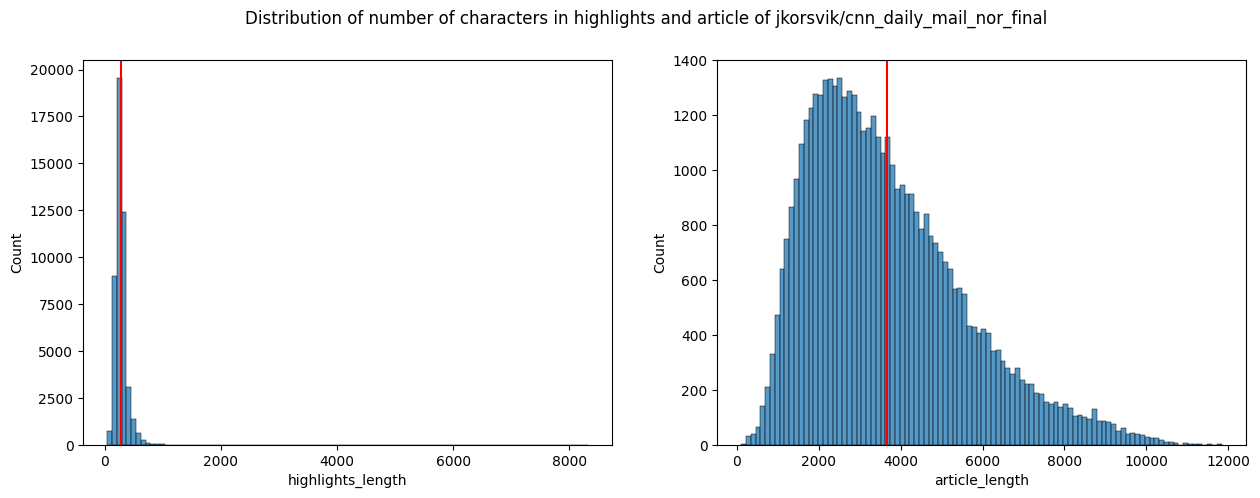

In [12]:
# Plot the disributions of the number of characters in the highlights and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["highlights_length"], ax=ax[0], bins=100)
sns.histplot(df["article_length"], ax=ax[1], bins=100)
ax[0].axvline(df["highlights_length"].mean(), color="red")
ax[1].axvline(df["article_length"].mean(), color="red")
fig.suptitle(f"Distribution of number of characters in highlights and article of {dataset_name}")

In [13]:
# Add two columns to train_df with the number of characters in the highlights and article
df["highlights_n_words"] = df["highlights"].str.split().apply(len)
df["article_n_words"] = df["article"].str.split().apply(len)

In [14]:
# Mean and meadiian of the number of characters in the highlights and article
print("Mean number of words in the highlights: ", df["highlights_n_words"].mean())
print("Median number of words in the highlights: ", df["highlights_n_words"].median())
print("Mean number of words in the article: ", df["article_n_words"].mean())
print("Median number of words in the article: ", df["article_n_words"].median())

Mean number of words in the highlights:  44.33635072396176
Median number of words in the highlights:  42.0
Mean number of words in the article:  601.356638612707
Median number of words in the article:  544.0


Text(0.5, 0.98, 'Distribution of number of words in highlights and article of jkorsvik/cnn_daily_mail_nor_final')

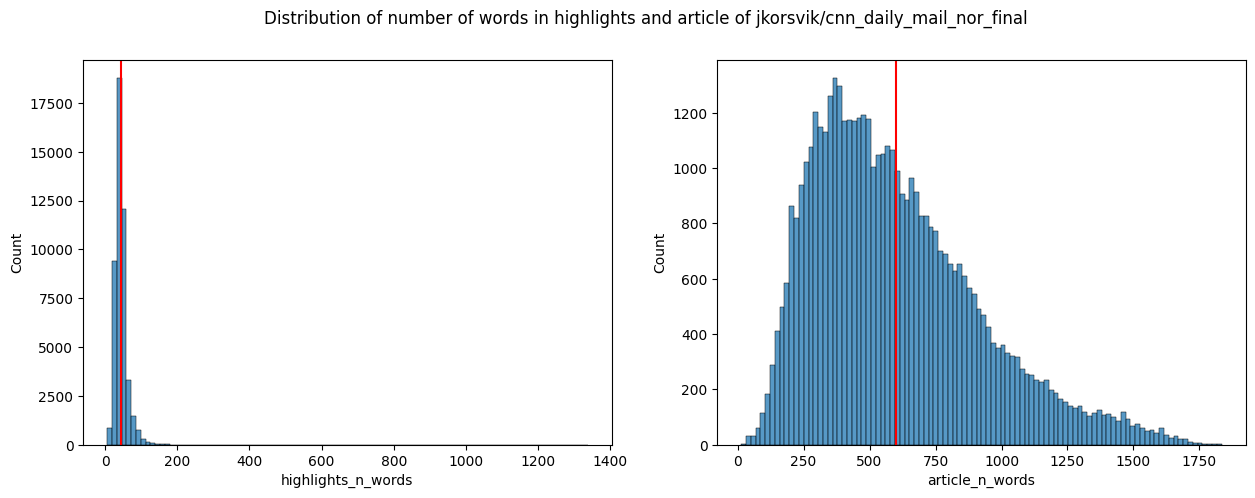

In [15]:
# Plot the disributions of the number of characters in the highlights and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["highlights_n_words"], ax=ax[0], bins=100)
sns.histplot(df["article_n_words"], ax=ax[1], bins=100)
ax[0].axvline(df["highlights_n_words"].mean(), color="red")
ax[1].axvline(df["article_n_words"].mean(), color="red")
fig.suptitle(f"Distribution of number of words in highlights and article of {dataset_name}")

In [16]:
def tokenize(text):
    return tokenizer(text).input_ids

In [17]:
# Add two columns to train_df with the number of characters in the highlights and article
df["highlights_tokens"] = df["highlights"].apply(tokenize)
df["article_tokens"] = df["article"].apply(tokenize)

In [18]:
# Add two columns to train_df with the number of characters in the highlights and article
df["highlights_n_tokens"] = df["highlights_tokens"].apply(len)
df["article_n_tokens"] = df["article_tokens"].apply(len)

In [19]:
tokenizer(df["highlights"].iloc[0])

{'input_ids': [2437, 259, 17232, 482, 202502, 15979, 1565, 60100, 5736, 259, 266, 1231, 8956, 261, 1361, 18102, 260, 61331, 278, 39860, 429, 259, 266, 13395, 346, 63706, 259, 266, 7448, 259, 21762, 2754, 260, 644, 373, 154295, 877, 18889, 260, 2437, 54697, 265, 482, 22287, 278, 115879, 195259, 259, 88595, 1787, 259, 64646, 259, 21762, 2754, 260, 68272, 259, 266, 7448, 73581, 260, 1669, 169723, 6685, 209316, 263, 512, 3768, 93879, 260, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [20]:
# Mean and meadiian of the number of tokens in the highlights and article
print("Mean number of tokens in the highlights: ", df["highlights_n_tokens"].mean())
print("Median number of tokens in the highlights: ", df["highlights_n_tokens"].median())
print("Mean number of tokens in the article: ", df["article_n_tokens"].mean())
print("Median number of tokens in the article: ", df["article_n_tokens"].median())

Mean number of tokens in the highlights:  80.19166437005788
Median number of tokens in the highlights:  76.0
Mean number of tokens in the article:  1044.067181107036
Median number of tokens in the article:  946.0


Text(0.5, 0.98, 'Distribution of number of tokens in highlights and article of jkorsvik/cnn_daily_mail_nor_final')

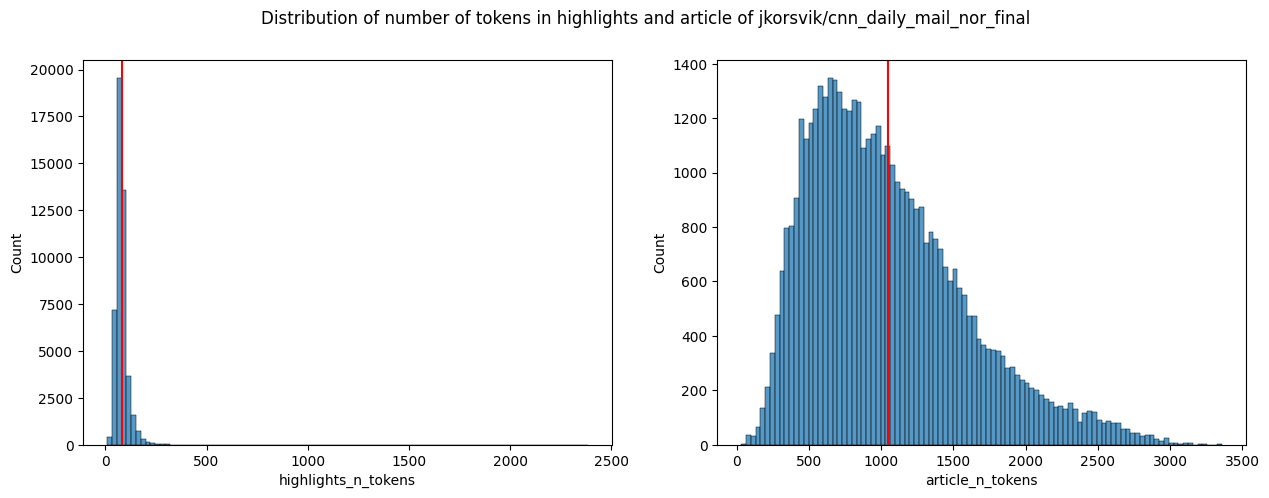

In [21]:
# Plot the disributions of the number of characters in the highlights and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["highlights_n_tokens"], ax=ax[0], bins=100)
sns.histplot(df["article_n_tokens"], ax=ax[1], bins=100)
ax[0].axvline(df["highlights_n_tokens"].mean(), color="red")
ax[1].axvline(df["article_n_tokens"].mean(), color="red")
fig.suptitle(f"Distribution of number of tokens in highlights and article of {dataset_name}")

In [22]:
!pip install plotly -q

In [23]:
import plotly.graph_objs as go
import plotly.subplots as sp
import numpy as np
BINS = 50

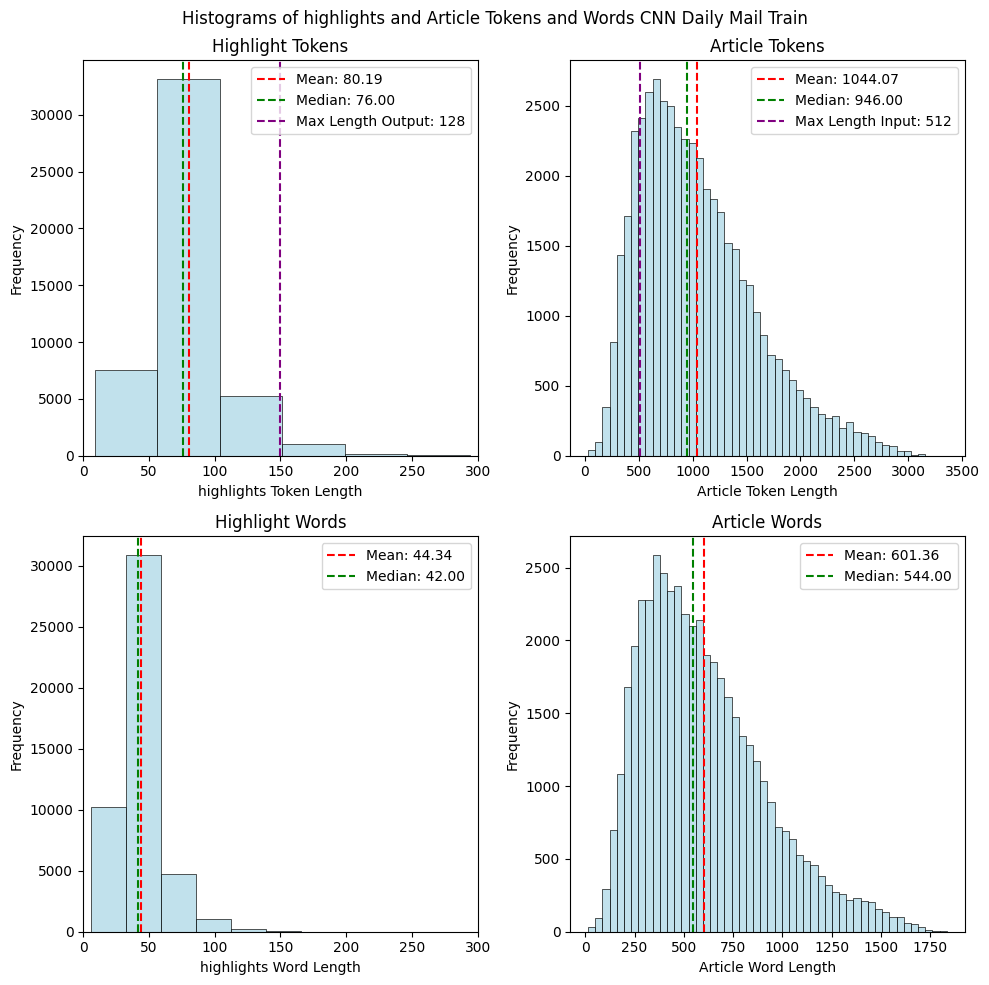

In [103]:
data1 = df["highlights_n_tokens"]
data2 = df["article_n_tokens"]
data3 = df["highlights_n_words"]
data4 =  df["article_n_words"]

mean1, median1 = np.mean(data1), np.median(data1)
mean2, median2 = np.mean(data2), np.median(data2)
mean3, median3 = np.mean(data3), np.median(data3)
mean4, median4 = np.mean(data4), np.median(data4)

medians = [np.median(data) for data in [data1, data2, data3, data4]]
means = [np.mean(data) for data in [data1, data2, data3, data4]]


# Your existing code for data and calculations

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Histograms of highlights and Article Tokens and Words CNN Daily Mail Train")

# Plot histograms with mean and median lines
hist_data = [data1, data2, data3, data4]
titles = ["Highlight Tokens", "Article Tokens", "Highlight Words", "Article Words"]

for i, (data, mean, median, title) in enumerate(zip(hist_data, means, medians, titles)):
    row, col = divmod(i, 2)

    sns.histplot(ax=axes[row, col], data=data, bins=BINS, kde=False, color="lightblue")
    axes[row, col].axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
    axes[row, col].axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
    if "Tokens" in title:
        if "Article" in title:
            axes[row, col].axvline(512, color="purple", linestyle="--", label=f"Max Length Input: 512")
        else:
            axes[row, col].axvline(150, color="purple", linestyle="--", label=f"Max Length Output: 128")
    axes[row, col].set_title(title)
    axes[row, col].legend()

# Set x and y axis labels
axes[0, 0].set(xlabel="highlights Token Length", ylabel="Frequency", xlim=(0, 300))
axes[0, 1].set(xlabel="Article Token Length", ylabel="Frequency")
axes[1, 0].set(xlabel="highlights Word Length", ylabel="Frequency", xlim=(0, 300))
axes[1, 1].set(xlabel="Article Word Length", ylabel="Frequency")

plt.tight_layout()
plt.savefig(f"{dataset_name.split('/')[-1]}_{split}_distribution.png")
plt.show()

In [97]:
from google.colab import files
df[df["highlights_n_tokens"] > 1000]

,article,highlights,id,highlights_length,article_length,highlights_n_words,article_n_words,highlights_tokens,article_tokens,highlights_n_tokens,article_n_tokens
3935,Han var den foraktede «krokrygg» kongen av Tu...,Fem dagers feiring for den siste engelske kon...,161124d0534846c7e4a137cb851c1bc11308759f,8316,2538,1337,397,"[70618, 350, 22180, 37882, 2848, 332, 530, 305...","[2437, 567, 530, 332, 45365, 368, 404, 146631,...",2383,746
42341,Ved. Sophie Borland og Daniel Martin. FORKYNN...,11 av de 14 sykehuslegatene som er etterforsk...,963aad5b8e87249058feee610520d683411faacd,4259,7713,644,1236,"[730, 526, 269, 818, 259, 118821, 80087, 405, ...","[10674, 260, 259, 75944, 9657, 1564, 373, 7330...",1226,2210


In [ ]:
for word in df[df["highlights_n_tokens"] > 2000].highlights:
    print(word)



 Fem dagers feiring for den siste engelske kongen til å falle i kamp begynner i dag. Den siste reisen begynner ved Bosworth Field og slutter ved Leicester Cathedral. Richard blir begravet på torsdag etter at han er til stede hos levende slektninger. DNA-analyse bekreftet levninger funnet i bilpark i 2012 var Richards. Richard IIIs kiste forlater Leicester University for Bosworth Field i en svart Jaguar likbil, eskortert av fire politiutstillere og limousiner, for å starte den foreløpige etappen av reisen. Eikekisten ble laget av Michael Ibsen, Rikards nevø 17 ganger fjernet, hvis families DNA ble brukt til å identifisere kongens skjelett. Beina har blitt pakket i ull og Rikards hender og føtter har blitt plassert i linposer, brodert med roser av barn ved Leicesters Rikard III Primary School. Hos Kongen er en rosenkrans av tre, emblert med en emaljert Hvit rose. Skjelettet er dekket av et rått lintøy, brodert med York-roser, av Elizabeth Noakes, fra Richard III Society. Cortege forlater

In [26]:
check = load_dataset(
   'cnn_dailymail', '3.0.0')

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [58]:
chdfval = check["validation"].to_pandas()
chdftrain = check["train"].to_pandas()
chdftest = check["test"].to_pandas()

df_merged = df.copy()


In [59]:
df_merged0 = df_merged.merge(chdfval, how="inner", on="id")
df_merged1 = df_merged.merge(chdftest, how="inner", on="id")
df_merged2 = df_merged.merge(chdftrain, how="inner", on="id")

In [60]:
df_merged = pd.concat([df_merged0, df_merged1, df_merged2], axis=0)

In [62]:
df_merged.shape

(47171, 13)

In [66]:
# Add two columns to train_df with the number of characters in the highlights and article
df_merged["highlights_n_words_y"] = df_merged["highlights_y"].str.split().apply(len)
df_merged["article_n_words_y"] = df_merged["article_y"].str.split().apply(len)

In [ ]:
df_merged[abs(df_merged["highlights_n_words_y"] - df_merged["highlights_n_words"]) > 30][["highlights_x", "highlights_y"]]

In [ ]:
df_merged[abs(df_merged["article_n_words_y"] - df_merged["article_n_words"]) > 300][["article_x", "article_y"]]

In [89]:
article_diff = df_merged["article_n_words_y"] - df_merged["article_n_words"]
highlight_diff = df_merged["highlights_n_words_y"] - df_merged["highlights_n_words"]

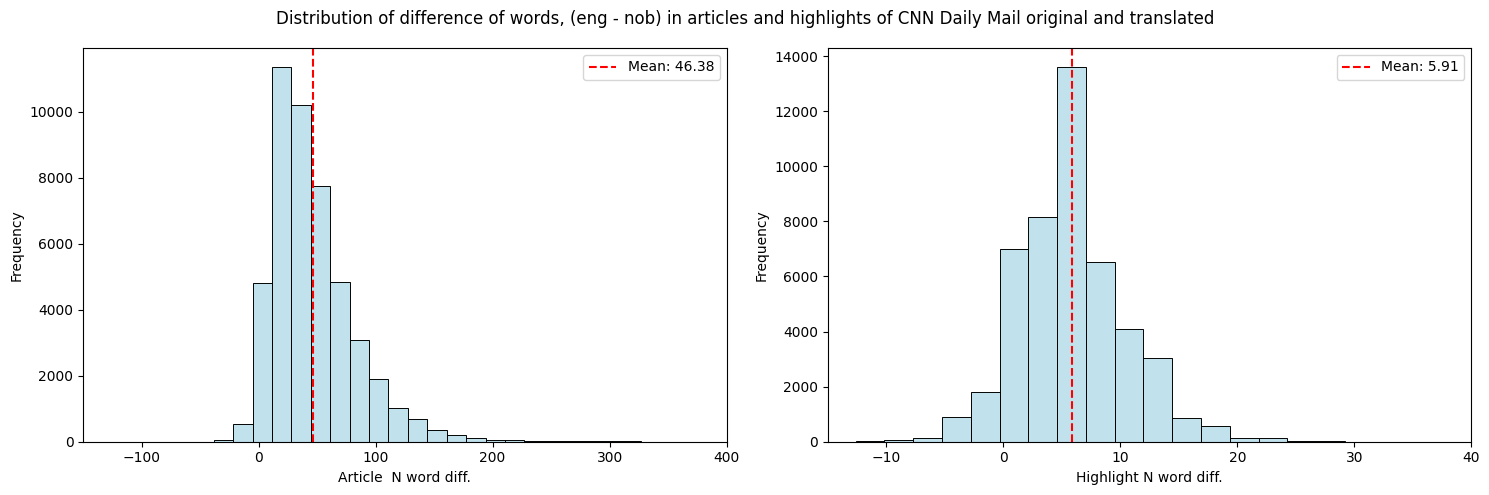

In [104]:
# Plot the disributions of the number of characters in the highlights and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(article_diff, ax=ax[0],  kde=False, color="lightblue", bins=50)
sns.histplot(highlight_diff, ax=ax[1],  kde=False, color="lightblue", bins=50)
ax[0].axvline(article_diff.mean(), color="red", linestyle="--", label=f"Mean: {article_diff.mean():.2f}")
ax[1].axvline(highlight_diff.mean(), color="red", linestyle="--", label=f"Mean: {highlight_diff.mean():.2f}")

ax[0].set(xlabel="Article  N word diff.", ylabel="Frequency", xlim=(-150,400))
ax[1].set(xlabel="Highlight N word diff.", ylabel="Frequency", xlim=(-15, 40))
#axes[0].set_title("title")
ax[0].legend()
#axes[1].set_title(title)
ax[1].legend()
fig.suptitle(f"Distribution of difference of words, (eng - nob) in articles and highlights of CNN Daily Mail original and translated")

plt.tight_layout()
plt.savefig(f"{dataset_name.split('/')[-1]}_{split}translatedvsorginial.png")
plt.show()